# **Stock Market Prediction And Forecasting Using Stacked LSTM**

In [1]:
#Importing required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [4]:
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
stock = pd.read_csv(url)

In [5]:
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [6]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
stock.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
stock.shape

(2035, 8)

In [11]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [12]:
stock['Date']= pd.to_datetime(stock['Date'])

In [14]:
#Sorting values w.r.t the dates
stock.sort_values( by='Date', ignore_index= True,inplace= True )
stock

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
2030,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [15]:
stock['Date'].value_counts()

2010-07-21    1
2015-12-29    1
2016-01-15    1
2016-01-14    1
2016-01-13    1
             ..
2013-03-26    1
2013-03-25    1
2013-03-22    1
2013-03-21    1
2018-09-28    1
Name: Date, Length: 2035, dtype: int64

In [52]:
stock_close = stock.reset_index()['Close']
stock_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

<AxesSubplot:>

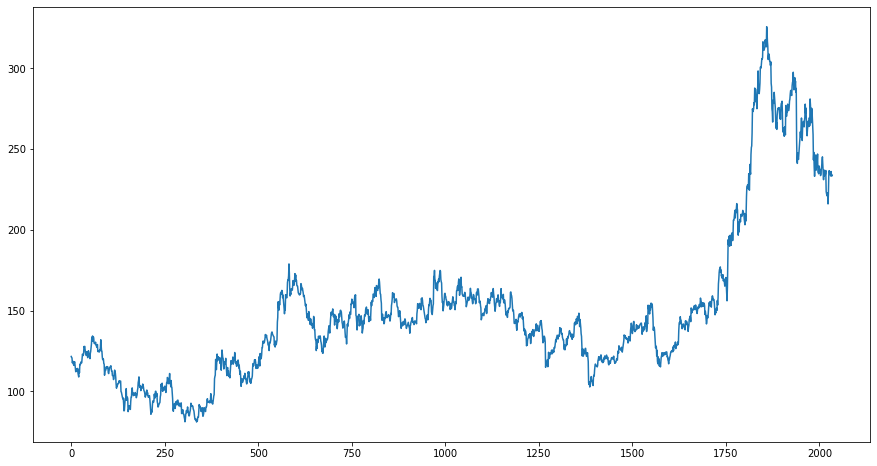

In [53]:
stock_close.plot(figsize= (15,8))   #Plotting Close value

In [50]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler(feature_range=(0,1))
data = scale.fit_transform(np.array(stock_close).reshape(-1,1))  #Scaling and Reshaping the data
data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [28]:
train_size = int(len(data)*0.80)
test_size = len(data)-train_size
train_data = data[0:train_size,:]
test_data = data[train_size:len(data),:]

In [29]:
train_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.24877451],
       [0.25245098],
       [0.24795752]])

In [61]:
test_data

array([[0.26633987],
       [0.25714869],
       [0.25735294],
       [0.24918301],
       [0.24611928],
       [0.23611111],
       [0.24162582],
       [0.24183007],
       [0.24775327],
       [0.24775327],
       [0.24121732],
       [0.23815359],
       [0.23672386],
       [0.23325163],
       [0.2559232 ],
       [0.24571078],
       [0.25490196],
       [0.25449346],
       [0.25245098],
       [0.24693627],
       [0.24448529],
       [0.22937092],
       [0.23917484],
       [0.24489379],
       [0.26041667],
       [0.26082516],
       [0.26756536],
       [0.26531863],
       [0.25388072],
       [0.28860294],
       [0.28676471],
       [0.27634804],
       [0.28431373],
       [0.28451797],
       [0.28267974],
       [0.28431373],
       [0.28982843],
       [0.29289216],
       [0.29452614],
       [0.28451797],
       [0.28594771],
       [0.29595588],
       [0.28921569],
       [0.28410948],
       [0.27982026],
       [0.2745098 ],
       [0.28288399],
       [0.290

In [31]:
train_size

1628

In [32]:
test_size

407

In [33]:
time_step = 100
x_train,y_train = [],[]
for i in range(len(train_data)-time_step-1):
    a = train_data[i:(i+time_step),0]
    x_train.append(a)
    y_train.append(train_data[i+ time_step,0])
x_train,y_train = np.array(x_train),np.array(y_train)

In [34]:
x_test,y_test = [],[]
for i in range(len(test_data)-time_step-1):
    b = test_data[i:(i+time_step),0]
    x_test.append(b)
    y_test.append(test_data[i+time_step,0])
x_test,y_test = np.array(x_test),np.array(y_test)

In [35]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100)
Y_train shape : (1527,)
X_test shape  : (306, 100)
Y_test shape  : (306,)


In [36]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test  = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [37]:
print("X_train shape :", x_train.shape)
print("Y_train shape :", y_train.shape)
print("X_test shape  :", x_test.shape)
print("Y_test shape  :", y_test.shape)

X_train shape : (1527, 100, 1)
Y_train shape : (1527,)
X_test shape  : (306, 100, 1)
Y_test shape  : (306,)


In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from sklearn.metrics import mean_squared_error

In [39]:
#Building the model
model = Sequential()
#Adding layers
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(Dropout(0.2))

In [40]:
model.add(Dense(units=1))

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [42]:
model.fit(x=x_train,  y=y_train, batch_size=32, epochs=90,   validation_data=(x_test,y_test), verbose=1)

Epoch 1/90
48/48 [==============================] - 15s 56ms/step - loss: 0.0060 - val_loss: 0.0067
Epoch 2/90
48/48 [==============================] - 1s 25ms/step - loss: 0.0017 - val_loss: 0.0115
Epoch 3/90
48/48 [==============================] - 1s 18ms/step - loss: 0.0014 - val_loss: 0.0075
Epoch 4/90
48/48 [==============================] - 1s 18ms/step - loss: 0.0015 - val_loss: 0.0326
Epoch 5/90
48/48 [==============================] - 1s 18ms/step - loss: 0.0018 - val_loss: 0.0202
Epoch 6/90
48/48 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0209
Epoch 7/90
48/48 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 0.0149
Epoch 8/90
48/48 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 9/90
48/48 [==============================] - 1s 19ms/step - loss: 9.7151e-04 - val_loss: 0.0230
Epoch 10/90
48/48 [==============================] - 1s 18ms/step - loss: 9.4550e-04 - val_loss: 0.0163


In [43]:
#PREDICTION

train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

10/10 [==============================] - 0s 8ms/step


In [45]:
#Reversing the MinMax Scaler

train_pred = scale.inverse_transform(train_pred)
test_pred = scale.inverse_transform(test_pred)

In [47]:
#EVALUATION
from math import sqrt
mse_train = sqrt(mean_squared_error(y_train,train_pred))
mse_train

133.30894807142022

In [48]:
mse_test = sqrt(mean_squared_error(y_test, test_pred))
mse_test

238.9021559910182

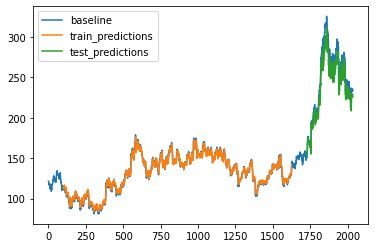

In [56]:
#Visualizing the predictions
lookback = 100
train_pred_plot = np.empty_like(data)
train_pred_plot[:,:] = np.nan
train_pred_plot[lookback: len(train_pred)+lookback, :] = train_pred

test_pred_plot = np.empty_like(data)
test_pred_plot[:,:] = np.nan
test_pred_plot[len(train_pred)+(lookback*2)+1: len(data)-1, : ] = test_pred

plt.plot(scale.inverse_transform(data),label='baseline')
plt.plot(train_pred_plot,label='train_predictions')
plt.plot(test_pred_plot,label= 'test_predictions')
plt.legend()
plt.show()

In [57]:
x_input = test_data[307:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.8527369281045751,
 0.8621323529411764,
 0.8345588235294117,
 0.84375,
 0.7146650326797386,
 0.6605392156862745,
 0.6542075163398693,
 0.6803513071895424,
 0.6689133986928104,
 0.6642156862745099,
 0.678921568627451,
 0.6913807189542482,
 0.7089460784313726,
 0.7226307189542485,
 0.7340686274509802,
 0.7212009803921569,
 0.749795751633987,
 0.7689950980392157,
 0.7446895424836601,
 0.7120098039215685,
 0.7467320261437909,
 0.7549019607843137,
 0.7604166666666667,
 0.7598039215686274,
 0.7465277777777777,
 0.7624591503267975,
 0.7706290849673203,
 0.8041258169934642,
 0.7810457516339868,
 0.7941176470588236,
 0.7602124183006536,
 0.7348856209150327,
 0.7240604575163399,
 0.7399918300653596,
 0.749795751633987,
 0.7614379084967322,
 0.7542892156862746,
 0.7475490196078431,
 0.769607843137255,
 0.7495915032679739,
 0.8171977124183007,
 0.8020833333333335,
 0.7773692810457518,
 0.7571486928104576,
 0.7937091503267975,
 0.7916666666666667,
 0.7714460784313726,
 0.7526552287581698,
 0.7269

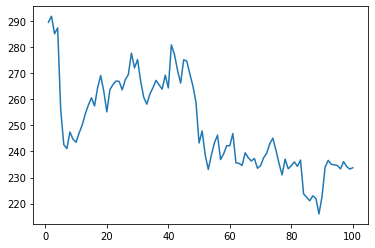

In [59]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scale.inverse_transform(data[1935 : ]))
     